<a href="https://colab.research.google.com/github/BrunoOrtega9/Modulo-5/blob/main/Machine_Learning_decision_tree_classifier_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science
### Módulo 2 _ Machine Learning
### Aprendizaje supervisado

# Arboles de Decisión
### `Skillsforindustry.org`


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline



In [ ]:
import warnings

warnings.filterwarnings('ignore')

### Importación de Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/data_automotriz.csv', header=None)

FileNotFoundError: ignored

### EDA

In [ ]:
# exminar el Dataset
df.shape

(1728, 7)

buying: Precio del coche. Valores: vhigh, high, med, low.  
maint: Precio de mantenimiento. Valores: vhigh, high, med, low.  
doors: Número de puertas. Valores: 2, 3, 4, 5more.  
persons: Número de pasajeros. Valores: 2, 4, more.  
lug_boot: Tamaño del maletero. Valores: small, med, big.  
safety: Seguridad del coche. Valores: high, med, low.  

In [ ]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Cambiar el nombre de las columnas

Podemos ver que el conjunto de datos no tiene los nombres de columna adecuados. Las columnas simplemente se etiquetan como 0,1,2 .... y así sucesivamente. Deberíamos dar nombres propios a las columnas. Lo haré de la siguiente manera: -

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

### Significado de las columnas

buying -- buying price

maint-- price of the maintenance

doors -- number of doors

persons -- capacity in terms of persons to carry

lug_boot -- the size of luggage boot

safety --estimated safety of the car


In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Ver info del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Distribución de los valores y su frecuencia

Frecuecencia de valores categoricos

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())   


vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


### Resumen de variables


- hay 7 tipos de variables. todas son de tipo categorico


-  `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` y `class`.


- `class` es nuestra variable target

### Explorando la varible `class` 

In [ ]:
df['class'].value_counts(normalize = True)

unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64

 `class` es una variable ordinaria

### Missing values 

In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# Declarar "feature vector" y " target variable"

In [ ]:
X = df.drop(['class'], axis=1)
y = df['class']

# Separamos nuestra data en *Train y Test*

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [ ]:
# verificar el Shape

X_train.shape, X_test.shape

((1157, 6), (571, 6))

# Feature Engineering

**Feature Engineering** es el proceso de transformar datos sin procesar en funciones útiles que nos ayudan a comprender mejor nuestro modelo y aumentar su poder predictivo. Realizaré ingeniería de funciones sobre diferentes tipos de variables.




In [ ]:
# Verificar Datatypes

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

## Encode : Variables categoricas



In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


Podemos ver que todas las variables son del tipo de datos categóricos ordinales.


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.3 MB/s 


In [ ]:
# importar category encoders 
# pip install category_encoders - para instalar por primera vez


import category_encoders as ce

In [ ]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train) #buying: vhigh
X_test = encoder.transform(X_test) #buying: not vhigh


X_train = encoder.fit_transform(X_train) #buying: not vhigh
X_test = encoder.transform(X_test) #buying: vhigh


In [ ]:
X_train

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2
...,...,...,...,...,...,...
1130,4,4,1,1,1,2
1294,4,3,2,1,3,3
860,2,3,2,1,1,2
1459,3,2,4,3,2,3


In [ ]:
df2 = pd.read_csv('/content/data_automotriz.csv', header=None)
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df2.columns = col_names

In [ ]:
df2.buying.value_counts()

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

In [ ]:
equivalencias = {
    "vhigh":8,
    "high": 6,
    "med": 4,
    "low": 2
}
df2.buying.replace(equivalencias)

0       8
1       8
2       8
3       8
4       8
       ..
1723    2
1724    2
1725    2
1726    2
1727    2
Name: buying, Length: 1728, dtype: int64

In [ ]:
X_test.head()


,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


Ahora tenemos la capacitación y el conjunto de pruebas listos para la construcción de modelos.

# Decision Tree Classifier con gini index** 

In [ ]:
# importar DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier


In [ ]:

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=7, random_state=0)

### Predecir los resultados del conjunto de prueba con gini index

In [ ]:
y_pred_gini = clf_gini.predict(X_test)


### Compruebe "Accuracy Score" con  criterion gini index

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy score con gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Accuracy score con gini index: 0.9335


Aqui, **y_test** son las verdaderas etiquetas de clase y **y_pred_gini** son las etiquetas de clase predichas en el conjunto de prueba.

### Comparar "Accuracy" con train-set y test-set 

Debemos tambien comprobar el overfitting 

In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'acc'],
      dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9404


### Comparar overfitting y underfitting

In [ ]:

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9404
Test set score: 0.9335


training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting. 


### Visualizar Arboles de Decisión 

[Text(0.4342105263157895, 0.9375, 'X[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.40789473684210525, 0.8125, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.4605263157894737, 0.8125, 'X[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.4342105263157895, 0.6875, 'X[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(0.17105263157894737, 0.5625, 'X[1] <= 2.5\ngini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.05263157894736842, 0.4375, 'X[0] <= 1.5\ngini = 0.259\nsamples = 131\nvalue = [20, 0, 111, 0]'),
 Text(0.02631578947368421, 0.3125, 'gini = 0.0\nsamples = 70\nvalue = [0, 0, 70, 0]'),
 Text(0.07894736842105263, 0.3125, 'X[1] <= 1.5\ngini = 0.441\nsamples = 61\nvalue = [20, 0, 41, 0]'),
 Text(0.05263157894736842, 0.1875, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32, 0]'),
 Text(0.10526315789473684, 0.1875, 'X[5] <= 2.5\ngini = 0.428\nsamples = 29\nvalue = [20, 0, 9, 0]'),

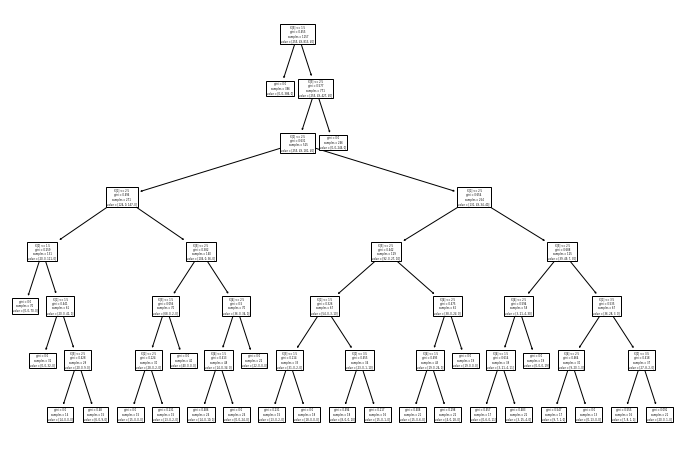

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

# Decision Tree Classifier con entropy** 

In [ ]:

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

### Predecir los resultados de Test set  con entropy

In [ ]:
y_pred_en = clf_en.predict(X_test)

### Comprobar "accuracy score" con  entropy

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy score con entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Accuracy score con entropy: 0.9159


### Comparar "Accuracy" con train-set y test-set 


Debemos tambien comprobar el overfitting 

In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'acc'],
      dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9378


### Comparar overfitting y underfitting

In [ ]:

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9378
Test set score: 0.9159


Los resultados son muy similares a los anteriores. 

The training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting. 


### Visualizar Arboles de Decisión

[Text(0.44375, 0.9375, 'X[5] <= 1.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.41875, 0.8125, 'entropy = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.46875, 0.8125, 'X[3] <= 2.5\nentropy = 1.474\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.44375, 0.6875, 'X[0] <= 2.5\nentropy = 1.638\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(0.175, 0.5625, 'X[1] <= 1.5\nentropy = 0.995\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.15, 0.4375, 'entropy = 0.0\nsamples = 68\nvalue = [0, 0, 68, 0]'),
 Text(0.2, 0.4375, 'X[5] <= 2.5\nentropy = 0.964\nsamples = 203\nvalue = [124, 0, 79, 0]'),
 Text(0.1, 0.3125, 'X[1] <= 2.5\nentropy = 0.714\nsamples = 102\nvalue = [82, 0, 20, 0]'),
 Text(0.05, 0.1875, 'X[0] <= 1.5\nentropy = 0.989\nsamples = 32\nvalue = [14, 0, 18, 0]'),
 Text(0.025, 0.0625, 'entropy = 0.0\nsamples = 18\nvalue = [0, 0, 18, 0]'),
 Text(0.075, 0.0625, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0, 0, 0]'),
 Text(0.15, 0.1875, 'X[3] <=

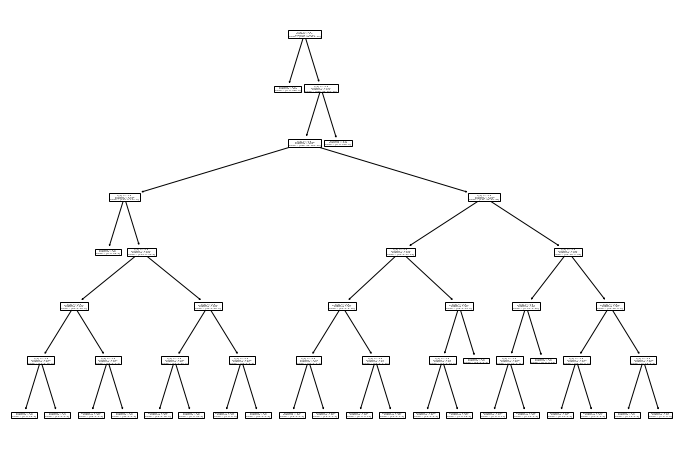

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

Ahora, con base en el análisis anterior, podemos concluir que la precisión de nuestro modelo de clasificación es muy buena. Nuestro modelo está haciendo un muy buen trabajo en términos de predecir las etiquetas de clase.


Pero no da la distribución subyacente de valores. Además, no dice nada sobre el tipo de errores que está cometiendo nuestro clasificador.


Tenemos otra herramienta llamada "Confusion Matrix" que viene a nuestro rescate.

# Confusion matrix


Una matriz de confusión es una herramienta para resumir el rendimiento de un algoritmo de clasificación. Una matriz de confusión nos dará una imagen clara del desempeño del modelo de clasificación y los tipos de errores producidos por el modelo. Nos da un resumen de predicciones correctas e incorrectas desglosadas por categoría. El resumen se representa en forma de tabla.


Son posibles cuatro tipos de resultados al evaluar el desempeño de un modelo de clasificación. Estos cuatro resultados se describen a continuación: -


**True Positives (TP)** – Los verdaderos positivos ocurren cuando predecimos que una observación pertenece a una determinada clase y la observación realmente pertenece a esa clase.


**True Negatives (TN)** – Los verdaderos negativos ocurren cuando predecimos que una observación no pertenece a una determinada clase y la observación en realidad no pertenece a esa clase.

**False Positives (FP)** – Los falsos positivos ocurren cuando predecimos que una observación pertenece a una determinada clase, pero la observación en realidad no pertenece a esa clase. Este tipo de error se llama **Type I error.**



**False Negatives (FN)** – Los falsos negativos ocurren cuando predecimos que una observación no pertenece a una determinada clase, pero la observación realmente pertenece a esa clase. Este es un error muy grave y se llama **Type II error.**




Estos cuatro resultados se resumen en una matriz de confusión que se presenta a continuación. 

Confusion matrix

 [[ 95  13  16   5]
 [  3  14   0   3]
 [  7   0 389   1]
 [  0   0   0  25]]


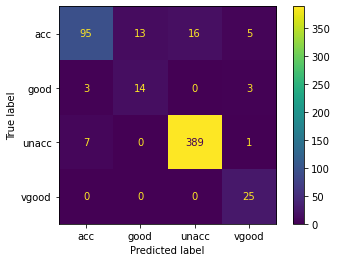

In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

plot_confusion_matrix(clf_en, X_test, y_test)  


# Classification Report


**Classification report** es otra forma de evaluar el rendimiento del modelo de clasificación. Muestra la  **precision**, **recall**, **f1** y **support** puntuaciones para el modelo. He descrito estos términos más adelante.

Podemos imprimir un informe de clasificación de la siguiente manera

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.90      0.74      0.81       129
        good       0.52      0.70      0.60        20
       unacc       0.96      0.98      0.97       397
       vgood       0.74      1.00      0.85        25

    accuracy                           0.92       571
   macro avg       0.78      0.85      0.81       571
weighted avg       0.92      0.92      0.92       571



# Resultados y conclusión  


1. En este proyecto, construyo un modelo de clasificador de árbol de decisiones para predecir la clase del automóvil. Construyo dos modelos, uno con criterio "**Gini index**" y otro con criterio "**Entropy**". El modelo arroja un rendimiento muy bueno, como lo indica la precisión del modelo en ambos casos, que resultó ser de **0,8021**.
2. En el modelo con el criterio "**Gini Index**", la puntuación de precisión del conjunto de entrenamiento es 0,7865 mientras que la precisión del conjunto de prueba es 0,8021. Estos dos valores son bastante comparables. Por lo tanto, no hay signos de *Overfitting*.
3. De manera similar, en el modelo con criterio "**Entropy**", la puntuación de precisión del conjunto de entrenamiento es 0,7865 mientras que la precisión del conjunto de prueba es 0,8021. Obtenemos los mismos valores que en el caso del criterio "gini". Por lo tanto, no hay signos de *Overfitting*
4. En ambos casos, la puntuación de precisión del conjunto de entrenamiento y del conjunto de prueba es la misma. Puede suceder debido a un pequeño conjunto de datos.
5. La matriz de confusión y el informe de clasificación arrojan muy buen rendimiento del modelo.